# 📘 Taller Evaluativo (20%) - Análisis de Portafolio
### Curso: Ingeniería Financiera / Programación  
### Herramienta: Google Colab  
---
### 🎯 Objetivo
Este taller busca que comprendas qué es un análisis de portafolio, cómo se calculan y analizan sus métricas (rentabilidad, riesgo y correlación), y cómo se interpreta el resultado para tomar decisiones de inversión.

👉 **Importante:** No basta con ejecutar el código. Debes **completar los espacios en blanco**, responder las **preguntas de investigación** y redactar un **análisis final**.

## 1. Importación de librerías
Primero, importa las librerías necesarias para trabajar con datos financieros.

In [7]:
#Instalacion de librerias

!pip install yfinance

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Librerias importadas")

Librerias importadas


## 2. Descarga de datos
Usa `yfinance` para descargar los precios de **Google (GOOG)**, **Amazon (AMZN)** y **Microsoft (MSFT)** durante los últimos 3 años. Utiliza la columna `Adj Close`.

🔎 **Pregunta:** ¿Por qué es más adecuado usar `Adj Close` que `Close` para un análisis financiero?

In [ ]:
#DESCARGAR LOS PRECIOS

!pip install yfinance
import yfinance as yf


#DEFINICR TICKETS
tickers = ["GOOG" , "AMZN" , "MSFT"]
#DEFINIR PRECIO DE LOS ULTIMOS 3 AÑOS
data = yf.download(tickers, period="3y")["Close"]
#MOSTRAR LAS PRIMERAS FILAS
display(data.head(5))# Primeros 5 datos
display(data.tail(5))# ultimos 5 datos

/tmp/ipython-input-3013959373.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="3y")["Close"]
[*********************100%***********************]  3 of 3 completed


Ticker,AMZN,GOOG,MSFT
Date,,,
2022-09-19,124.660004,103.144165,238.584915
2022-09-20,122.190002,101.137894,236.565125
2022-09-21,118.540001,99.330261,233.150085
2022-09-22,117.309998,99.886452,235.130814
2022-09-23,113.779999,98.495972,232.145065


Ticker,AMZN,GOOG,MSFT
Date,,,
2025-09-12,228.149994,241.380005,509.899994
2025-09-15,231.429993,251.759995,515.359985
2025-09-16,234.050003,251.419998,509.040009
2025-09-17,231.619995,249.850006,510.019989
2025-09-18,231.229996,252.330002,508.450012


# **¿ Porque es mas importante usar adj close que close en un analisis financiero ?**

### * Es mas importante porque refleja el retorno real del inversionista incorporando dividendos, splits y otrso dividendos y permite calcular rendimientos, volatilidad y precios de forma mas precisa comparable en el tiempo

###*Aunque no se encuentre en las columnas de yahooFinance

## 3. Visualización de precios
Grafica en una misma figura la evolución de los precios de cierre ajustados de las tres acciones.

🔎 **Pregunta:** ¿Cuál de las tres acciones muestra mayor crecimiento en estos 3 años?

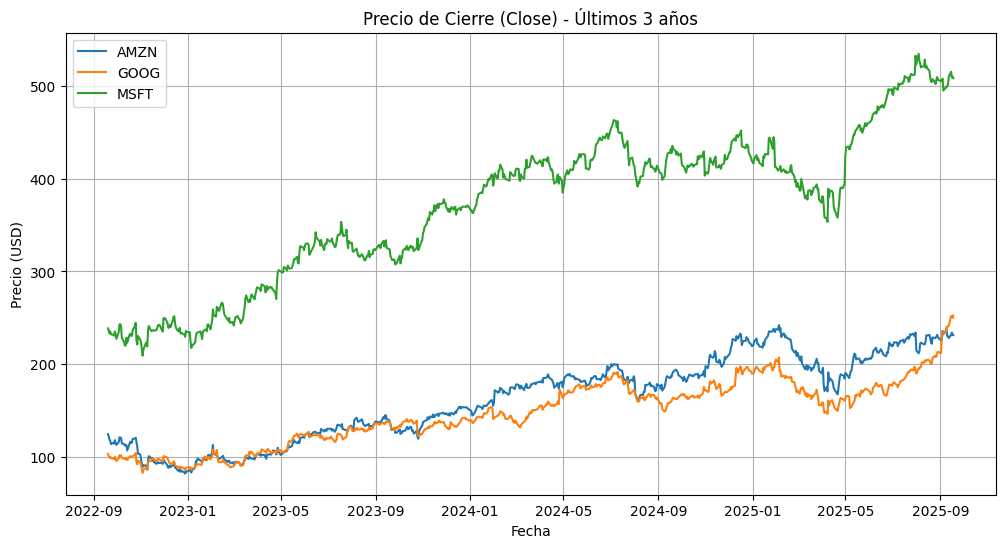

In [13]:
# COMPLETAR: grafica las tres series de precios en una sola gráfica

plt.figure(figsize=(12,6))
for col in data.columns:
  plt.plot(data[col], label=col)


plt.title('Evolucion precios-Últimos 3 años')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.show()

# **¿ cual de las tres aaciones muestra mas crecimiento en los tres años  ?**

### * Las acciones de mayor crecimiento gracieas a el analisis y como se observa en la graafica fueron las de microsoft (MSFT)

## 4. Rentabilidades
Calcula las **rentabilidades logarítmicas diarias** y grafícalas.

🔎 **Pregunta:** ¿Qué diferencias encuentras entre observar precios y observar rentabilidades?

In [17]:
# Rendimientos Logaritmicos diarios
import numpy as np
rendimientos = np.log(data / data.shift(1)).dropna()

#Mostrar rendimientos
rendimientos.head()

Ticker,AMZN,GOOG,MSFT
Date,,,
2022-09-20,-0.020013,-0.019643,-0.008502
2022-09-21,-0.030327,-0.018035,-0.014541
2022-09-22,-0.010430,0.005584,0.008460
2022-09-23,-0.030553,-0.014018,-0.012779
2022-09-26,0.011969,-0.003637,-0.001978


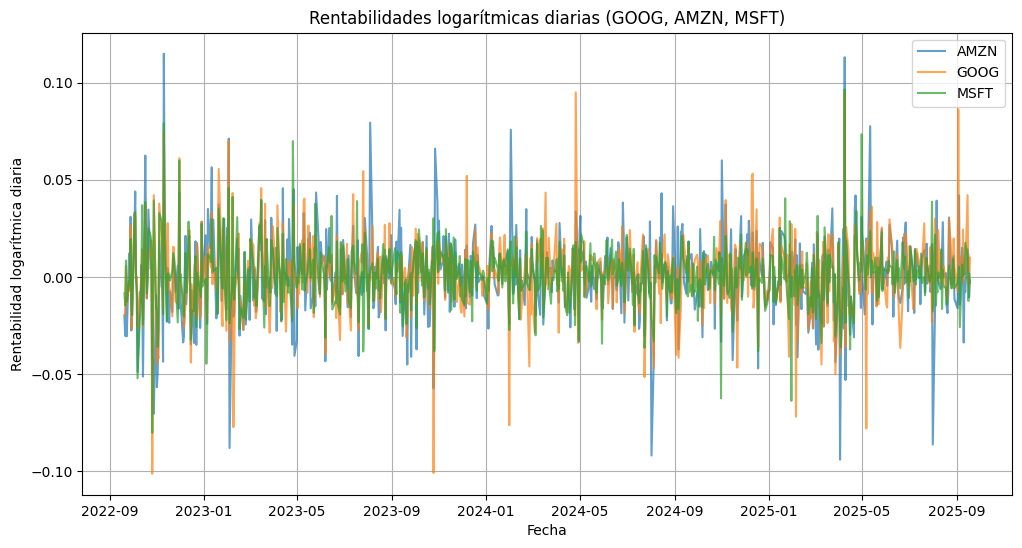

In [23]:
#GRAFICA
plt.figure(figsize=(12,6))

for col in rendimientos.columns:
    plt.plot(rendimientos.index, rendimientos[col], label=col, alpha=0.7)

plt.title("Rentabilidades logarítmicas diarias (GOOG, AMZN, MSFT)")
plt.xlabel("Fecha")
plt.ylabel("Rentabilidad logarítmica diaria")
plt.legend()
plt.grid(True)
plt.show()


# **¿ Que diferencias encuentras entre observar grafica y precios ?**

### * Al ver precios observamos el valor de mercado  y al ver rentabuilidades analizamos ganacias o perdidas para el inversosr

## 5. Medidas estadísticas
Calcula la **rentabilidad promedio** y la **volatilidad (desviación estándar)** de cada acción.

🔎 **Pregunta:** ¿Cuál acción es más riesgosa? ¿Cuál ofrece mayor retorno?

In [25]:
# COMPLETAR: calcula media y desviación estándar

media = rendimientos.mean() # retorno promedio diario
volatilidad = rendimientos.std() # volatilidad diaria

print("Rentabilidad promedio diaria:")
print(media)

print("\nVolatilidad diaria:")
print(volatilidad)

Rentabilidad promedio diaria:
Ticker
AMZN    0.000822
GOOG    0.001190
MSFT    0.001006
dtype: float64

Volatilidad diaria:
Ticker
AMZN    0.021280
GOOG    0.019836
MSFT    0.015977
dtype: float64


# **¿ Cual accion es mas riesgosa y cual de mayor retorno ?**

### * mayor retorno es la accion de google (0.001190)
### * mas volatil es la accion de amazon (0.021280)

## 6. Correlación entre activos
Calcula y grafica la matriz de correlación entre las acciones.

🔎 **Pregunta:** ¿Qué significa que dos acciones tengan una correlación cercana a 1? ¿Y cercana a 0 o negativa?

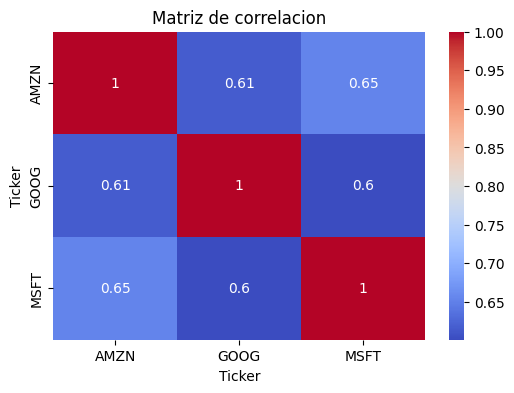

In [27]:
# COMPLETAR: calcula la correlación y haz un mapa de calor con seaborn
import seaborn as sns

correlacion = rendimientos.corr() # Matriz de correlacion

plt.figure(figsize=(6,4))
sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.title("Matriz de correlacion")
plt.show()

# **¿ Qué significa que dos acciones tengan una correlación cercana a 1? ¿Y cercana a 0 o negativa ?**

### * Una correlación cercana a +1 significa que los activos se mueven casi igual, ofreciendo poca diversificación.
### * Una correlación cercana a 0 implica independencia en los movimientos, lo que aporta mayor beneficio diversificador en un portafolio
###* Una correlación negativa muestra que se mueven en direcciones opuestas, siendo ideal para cubrir riesgos y equilibrar pérdidas con ganancias

## 7. Portafolio simulado
Supón un portafolio con la siguiente distribución:
- 40% Google
- 30% Amazon
- 30% Microsoft

Calcula el **retorno esperado** y la **volatilidad del portafolio**.

🔎 **Preguntas:**
1. ¿Cómo interpretas el retorno esperado del portafolio?
2. ¿Qué efecto tuvo la diversificación sobre la volatilidad respecto a invertir en una sola acción?

In [28]:
# COMPLETAR: cálculo del retorno y riesgo del portafolio

pesos = np.array([0.4, 0.3, 0.3])

# Retorno esperado del portafolio
retorno_portafolio = np.dot(pesos, media)

# Matriz de covarianza
covarianza = rendimientos.cov()

#volatilidad del portafolio
vol_portafolio = np.sqrt(np.dot(pesos.T, np.dot(covarianza, pesos)))

print("Retorno esperado del portafolio (diario):", retorno_portafolio)
print("Volatilidad del portafolio (diaria):", vol_portafolio)

Retorno esperado del portafolio (diario): 0.0009873732379252127
Volatilidad del portafolio (diaria): 0.016753979226409376


# **¿Cómo interpretas el retorno esperado del portafolio?**

### * el retorno esperado diario es de casi un 0.1 % diario lo que es un buen retorno diversificado
### * En cuanto la volatilidad la diversificcion redujo el riesgo total al no combina activos correalcionados


## ✍️ 8. Conclusión final

Redacta un análisis completo del portafolio respondiendo:

## 1. ¿Qué acción fue más rentable y cuál más riesgosa?

*Más rentable es GOOG, con la mayor rentabilidad promedio diaria.

*Más riesgosa es AMZN, con la mayor volatilidad diaria.

## 2. ¿Qué tan correlacionadas están las acciones?

* Las tres tienden a moverse en un amisma direccion gracias a sus correlaciones altas y positivas

##3. ¿Qué aportó la diversificación al portafolio?

* Permitio reducir la volatilidad y mantener un bune retorno aunque aun tiene dependencia del sector tecnologico

## 4. Si fueras un inversionista, ¿invertirías en este portafolio? Justifica tu respuesta.

* Si invertiria en el portafolio gracias a su retorno positivo apesar de su volatilidad es un riesgo moderado que al ser empresas lideres, solidas y con trayectoria positiva y estable puedo poner mi confianza en ellas

* Si es verdad que se deveria diversificar para porteccion contra caidas del sector